In [64]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from pandas import get_dummies
from numpy import array

In [77]:
df = pd.read_csv("df_clean.csv")

In [78]:
df

,Unnamed: 0,Unnamed: 0.1,OSEBuildingID,DataYear,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility
0,1,1,2,2016,98101.0,47.61317,-122.33393,1996,1.0,11,...,0,1,0,0,0,0,0,0,0,0
1,4,4,8,2016,98121.0,47.61375,-122.34047,1980,1.0,18,...,0,0,0,0,0,0,0,1,0,0
2,34,34,43,2016,98108.0,47.53493,-122.31788,1992,1.0,3,...,0,0,0,0,0,0,0,0,0,0
3,43,43,57,2016,98101.0,47.61130,-122.33659,1973,1.0,5,...,0,0,0,0,0,0,0,0,0,0
4,47,47,62,2016,98101.0,47.61233,-122.33432,1930,1.0,20,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1598,1598,49737,2016,98109.0,47.62503,-122.35642,1918,1.0,3,...,0,0,0,0,0,0,0,0,0,0
155,1601,1601,49776,2016,98121.0,47.61156,-122.34401,1988,1.0,13,...,0,0,0,0,0,0,0,0,0,0
156,1609,1609,49802,2016,98107.0,47.66629,-122.38260,2013,1.0,4,...,0,0,0,0,0,0,0,1,0,0
157,1644,1644,50054,2016,98109.0,47.62251,-122.33390,2014,1.0,13,...,0,0,1,0,0,0,0,0,0,0


In [67]:
df.isnull().values.any()

True

In [68]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1663    False
1664    False
1665    False
1666    False
1667    False
Length: 1668, dtype: bool>

Unnamed: 0                           AxesSubplot(0.125,0.842624;0.0383663x0.0373762)
OSEBuildingID                      AxesSubplot(0.17104,0.842624;0.0383663x0.0373762)
DataYear                           AxesSubplot(0.217079,0.842624;0.0383663x0.0373...
CouncilDistrictCode                AxesSubplot(0.263119,0.842624;0.0383663x0.0373...
Latitude                           AxesSubplot(0.309158,0.842624;0.0383663x0.0373...
Longitude                          AxesSubplot(0.355198,0.842624;0.0383663x0.0373...
YearBuilt                          AxesSubplot(0.401238,0.842624;0.0383663x0.0373...
NumberofBuildings                  AxesSubplot(0.447277,0.842624;0.0383663x0.0373...
NumberofFloors                     AxesSubplot(0.493317,0.842624;0.0383663x0.0373...
PropertyGFATotal                   AxesSubplot(0.539356,0.842624;0.0383663x0.0373...
PropertyGFAParking                 AxesSubplot(0.585396,0.842624;0.0383663x0.0373...
PropertyGFABuilding(s)             AxesSubplot(0.631436,0.842624;

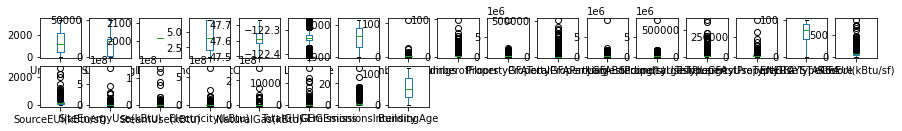

In [69]:
df.plot(kind="box" , subplots=True , layout=(17,17) , figsize=(15,15))

In [70]:
df

,Unnamed: 0,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
0,0,1,2016,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1927,...,60.0,81.699997,182.500000,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83,89
1,1,2,2016,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,...,61.0,94.800003,176.100006,8.387933e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86,20
2,2,3,2016,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1969,...,43.0,96.000000,241.899994,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,2089.28,2.19,47
3,3,5,2016,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,...,56.0,110.800003,216.199997,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67,90
4,4,8,2016,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,...,75.0,114.800003,211.399994,1.417261e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,3371,50222,2016,Nonresidential COS,Office,2,GREATER DUWAMISH,47.56722,-122.31154,1990,...,46.0,69.099998,161.699997,8.497457e+05,0.00,5.242709e+05,3.254750e+05,20.94,1.70,26
1664,3372,50223,2016,Nonresidential COS,Other,2,DOWNTOWN,47.59625,-122.32283,2004,...,NaN,59.400002,114.199997,9.502762e+05,0.00,3.965461e+05,5.537300e+05,32.17,2.01,12
1665,3373,50224,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,...,NaN,438.200012,744.799988,5.765898e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99,42
1666,3374,50225,2016,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,47.52832,-122.32431,1989,...,NaN,51.000000,105.300003,7.194712e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57,27


In [71]:
categ = ["GHGEmissionsIntensity","TotalGHGEmissions" , "NaturalGas(kBtu)", "NaturalGas(therms)", "Electricity(kBtu)", "NaturalGas(therms)", "Electricity(kWh)", "SteamUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SiteEnergyUse(kBtu)" , "SourceEUIWN(kBtu/sf)","SourceEUI(kBtu/sf)","SiteEUIWN(kBtu/sf)","SiteEUI(kBtu/sf)","ENERGYSTARScore","LargestPropertyUseTypeGFA","ThirdLargestPropertyUseTypeGFA","YearsENERGYSTARCertified","OSEBuildingID" , "DataYear" , "ZipCode" , "TaxParcelIdentificationNumber" , "Latitude" , "Longitude" , "YearBuilt" , "NumberofBuildings" , "NumberofFloors" , "PropertyGFATotal" , "PropertyGFAParking" , "PropertyGFABuilding(s)" , "BuildingType" , "PrimaryPropertyType"  , "PropertyName", "Address" , "City"  , "State", "Neighborhood" , "ListOfAllPropertyUseTypes"  , "LargestPropertyUseType", "SecondLargestPropertyUseType" , "ThirdLargestPropertyUseType"  , "SecondLargestPropertyUseTypeGFA", "ComplianceStatus" , "DefaultData"  , "Comments", "ComplianceStatus" , "Outlier" , "NaturalGas(kBtu)" , "Electricity(kBtu)" , "Electricity(kWh)"]

In [75]:
df[categ] = df[categ].apply(le.fit_transform)

KeyError: "['PropertyName', 'SourceEUIWN(kBtu/sf)', 'State', 'ListOfAllPropertyUseTypes', 'Electricity(kWh)', 'ZipCode', 'TaxParcelIdentificationNumber', 'Outlier', 'ComplianceStatus', 'Address', 'DefaultData', 'NaturalGas(therms)', 'Comments', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'City', 'YearsENERGYSTARCertified'] not in index"

In [76]:
df

,Unnamed: 0,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
1,1,2,2016,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,...,61.0,94.800003,176.100006,8387933.0,0.0,3242851.0,5145082.0,295.86,2.86,20
4,4,8,2016,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,...,75.0,114.800003,211.399994,14172606.0,0.0,5368607.0,8803998.0,505.01,2.88,36
34,35,43,2016,Campus,Mixed Use Property,2,GREATER DUWAMISH,47.53493,-122.31788,1992,...,8.0,221.699997,388.200012,448385312.0,0.0,150476283.0,297909000.0,16870.98,34.09,24
43,44,57,2016,NonResidential,Large Office,7,DOWNTOWN,47.61130,-122.33659,1973,...,78.0,56.299999,176.600006,9536161.0,0.0,9536160.0,0.0,66.48,0.40,43
47,48,62,2016,NonResidential,Hotel,7,DOWNTOWN,47.61233,-122.33432,1930,...,71.0,54.599998,158.600006,4841347.5,0.0,4290059.0,551288.0,59.19,0.60,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,3192,49737,2016,NonResidential,Retail Store,7,MAGNOLIA / QUEEN ANNE,47.62503,-122.35642,1918,...,67.0,92.199997,163.500000,3886545.0,0.0,1343774.0,2542771.0,144.41,3.29,98
1601,3199,49776,2016,NonResidential,Large Office,7,DOWNTOWN,47.61156,-122.34401,1988,...,88.0,56.700001,167.699997,13458948.0,0.0,12288296.0,1170651.0,147.84,0.42,28
1609,3221,49802,2016,NonResidential,Hotel,6,BALLARD,47.66629,-122.38260,2013,...,62.0,58.000000,182.300003,3497215.5,0.0,3497215.0,0.0,24.38,0.39,3
1644,3329,50054,2016,Nonresidential COS,Large Office,7,LAKE UNION,47.62251,-122.33390,2014,...,98.0,37.900002,99.199997,13239050.0,0.0,9925769.0,3313279.0,245.16,0.46,2


In [73]:
df.dropna(inplace=True)

In [74]:
df

,Unnamed: 0,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
1,1,2,2016,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,...,61.0,94.800003,176.100006,8387933.0,0.0,3242851.0,5145082.0,295.86,2.86,20
4,4,8,2016,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,...,75.0,114.800003,211.399994,14172606.0,0.0,5368607.0,8803998.0,505.01,2.88,36
34,35,43,2016,Campus,Mixed Use Property,2,GREATER DUWAMISH,47.53493,-122.31788,1992,...,8.0,221.699997,388.200012,448385312.0,0.0,150476283.0,297909000.0,16870.98,34.09,24
43,44,57,2016,NonResidential,Large Office,7,DOWNTOWN,47.61130,-122.33659,1973,...,78.0,56.299999,176.600006,9536161.0,0.0,9536160.0,0.0,66.48,0.40,43
47,48,62,2016,NonResidential,Hotel,7,DOWNTOWN,47.61233,-122.33432,1930,...,71.0,54.599998,158.600006,4841347.5,0.0,4290059.0,551288.0,59.19,0.60,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,3192,49737,2016,NonResidential,Retail Store,7,MAGNOLIA / QUEEN ANNE,47.62503,-122.35642,1918,...,67.0,92.199997,163.500000,3886545.0,0.0,1343774.0,2542771.0,144.41,3.29,98
1601,3199,49776,2016,NonResidential,Large Office,7,DOWNTOWN,47.61156,-122.34401,1988,...,88.0,56.700001,167.699997,13458948.0,0.0,12288296.0,1170651.0,147.84,0.42,28
1609,3221,49802,2016,NonResidential,Hotel,6,BALLARD,47.66629,-122.38260,2013,...,62.0,58.000000,182.300003,3497215.5,0.0,3497215.0,0.0,24.38,0.39,3
1644,3329,50054,2016,Nonresidential COS,Large Office,7,LAKE UNION,47.62251,-122.33390,2014,...,98.0,37.900002,99.199997,13239050.0,0.0,9925769.0,3313279.0,245.16,0.46,2


In [59]:
df.to_csv("test.csv")

In [60]:
numericColumns = ['OSEBuildingID', 'CouncilDistrictCode',  'NumberofFloors','PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'BuildingAge']
qualitativesColumns = list(df.select_dtypes(include=['object']))

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1 to 1645
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       159 non-null    int64  
 1   OSEBuildingID                    159 non-null    int64  
 2   DataYear                         159 non-null    int64  
 3   BuildingType                     159 non-null    object 
 4   PrimaryPropertyType              159 non-null    object 
 5   CouncilDistrictCode              159 non-null    int64  
 6   Neighborhood                     159 non-null    object 
 7   Latitude                         159 non-null    float64
 8   Longitude                        159 non-null    float64
 9   YearBuilt                        159 non-null    int64  
 10  NumberofBuildings                159 non-null    float64
 11  NumberofFloors                   159 non-null    int64  
 12  PropertyGFATotal     